<a href="https://colab.research.google.com/github/16sumanshiroy/CARD-FRAUD-DETECTION/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install -q tensorflow imbalanced-learn

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [23]:
df = pd.read_csv("creditcard.csv")

In [24]:
df.dropna(inplace=True)
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
X = df.drop(columns=['Class']).values
y = df['Class'].values
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled = X_resampled.reshape((X_resampled.shape[0], X_resampled.shape[1], 1))

# Splitting Data into Train & Test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)



In [25]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    LSTM(32, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 246s 45ms/step - accuracy: 0.9607 - loss: 0.1265 - val_accuracy: 0.9826 - val_loss: 0.0523
Epoch 2/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 236s 44ms/step - accuracy: 0.9844 - loss: 0.0459 - val_accuracy: 0.9926 - val_loss: 0.0216
Epoch 3/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 262s 44ms/step - accuracy: 0.9920 - loss: 0.0229 - val_accuracy: 0.9957 - val_loss: 0.0130
Epoch 4/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 258s 43ms/step - accuracy: 0.9950 - loss: 0.0147 - val_accuracy: 0.9955 - val_loss: 0.0185
Epoch 5/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 260s 43ms/step - accuracy: 0.9961 - loss: 0.0123 - val_accuracy: 0.9980 - val_loss: 0.0070
Epoch 6/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 230s 43ms/step - accuracy: 0.9973 - loss: 0.0093 - val_accuracy: 0.9979 - val_loss: 0.0072
Epoch 7/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 260s 43ms/step - accuracy: 0.9977 - loss: 0.0080 - val_accuracy: 0.9957 - val_loss: 0.0138
Epoch 8/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 263s 43ms/step - accuracy: 

In [27]:
# 🔹 Step 7: AI-Based Anomaly Detection with Autoencoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build Autoencoder
autoencoder = Sequential([
    Dense(X_train.shape[1], activation="relu", input_shape=(X_train.shape[1],)),
    Dense(16, activation="relu"),
    Dense(X_train.shape[1], activation="sigmoid")  # Reconstruct input data
])

autoencoder.compile(optimizer="adam", loss="mean_squared_error")

# Train Autoencoder (Unsupervised Anomaly Detection)
autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, validation_data=(X_test, X_test))

# Evaluate LSTM Model Accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ AI Model Accuracy (LSTM): {accuracy:.2f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 347464448.0000 - val_loss: 347197472.0000
Epoch 2/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 347806144.0000 - val_loss: 347197472.0000
Epoch 3/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 348073984.0000 - val_loss: 347197472.0000
Epoch 4/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 347863104.0000 - val_loss: 347197472.0000
Epoch 5/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 348069248.0000 - val_loss: 347197472.0000
Epoch 6/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 348372960.0000 - val_loss: 347197472.0000
Epoch 7/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 347889344.0000 - val_loss: 347197472.0000
Epoch 8/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 347810080.0000 - val_loss: 347197472.0000
Epoch 9/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 347841280.0000 - val_loss: 347197472.0000
Epoch 10/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build Autoencoder
autoencoder = Sequential([
    Dense(X_train.shape[1], activation="relu", input_shape=(X_train.shape[1],)),
    Dense(16, activation="relu"),
    Dense(X_train.shape[1], activation="sigmoid")  # Reconstruct input data
])

autoencoder.compile(optimizer="adam", loss="mean_squared_error")

# Train Autoencoder (Unsupervised Anomaly Detection)
autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, validation_data=(X_test, X_test))

Epoch 1/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 346805152.0000 - val_loss: 347197472.0000
Epoch 2/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 348190400.0000 - val_loss: 347197472.0000
Epoch 3/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 347498432.0000 - val_loss: 347197472.0000
Epoch 4/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 348016128.0000 - val_loss: 347197472.0000
Epoch 5/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 347583232.0000 - val_loss: 347197472.0000
Epoch 6/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 347478496.0000 - val_loss: 347197472.0000
Epoch 7/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 348537952.0000 - val_loss: 347197472.0000
Epoch 8/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 348651936.0000 - val_loss: 347197472.0000
Epoch 9/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 347758336.0000 - val_loss: 347197472.0000
Epoch 10/10
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step

In [29]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ AI Model Accuracy (LSTM): {accuracy:.2f}")


2666/2666 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - accuracy: 0.9984 - loss: 0.0059
✅ AI Model Accuracy (LSTM): 1.00


In [51]:
# Step 1: Reshape X_test to 2D for Autoencoder
print(f"Original X_test shape: {X_test.shape}")  # Check original shape
X_test_flat = X_test.reshape(X_test.shape[0], -1)  # Flatten to (samples, features)
print(f"Reshaped X_test_flat shape: {X_test_flat.shape}")  # Ensure it's 2D

# Step 2: Ensure Autoencoder input matches X_test_flat shape
print(f"Autoencoder expected input shape: {autoencoder.input_shape}")
print(f"Actual X_test_flat shape: {X_test_flat.shape}")

# 🔹 Step 3: Recompile Autoencoder Before Prediction
autoencoder.compile(optimizer="adam", loss="mean_squared_error")  # Fix Model

# 🔹 Step 4: Run prediction safely
try:
    X_test_pred = autoencoder.predict(X_test_flat)
    print("✅ Autoencoder Prediction Successful!")
except ValueError as e:
    print(f"❌ Prediction Error: {e}")
    raise  # Stop execution if prediction fails

# Step 5: Compute Reconstruction Error
reconstruction_error = np.mean(np.abs(X_test_flat - X_test_pred), axis=1)

# Step 6: Set threshold for anomaly detection (Top 5% of errors)
threshold = np.percentile(reconstruction_error, 95)
y_pred_autoencoder = (reconstruction_error > threshold).astype(int)

# Step 7: Print Fraud Cases Identified
print(f"✅ Anomaly Detection (Autoencoder) - Fraud Cases Identified: {sum(y_pred_autoencoder)}")


Original X_test shape: (85295, 30, 1)
Reshaped X_test_flat shape: (85295, 30)
Autoencoder expected input shape: (None, 30)
Actual X_test_flat shape: (85295, 30)
2666/2666 ━━━━━━━━━━━━━━━━━━━━ 72s 27ms/step
✅ Autoencoder Prediction Successful!
✅ Anomaly Detection (Autoencoder) - Fraud Cases Identified: 4265


In [52]:
model.save("fraud_detection_lstm.h5")

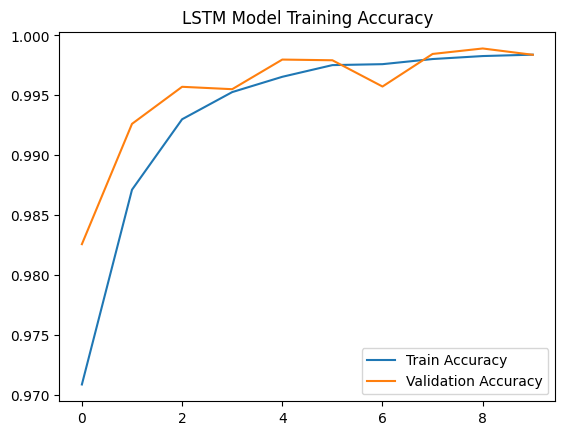

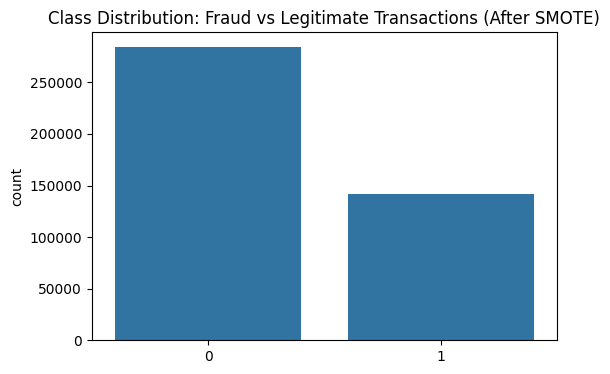

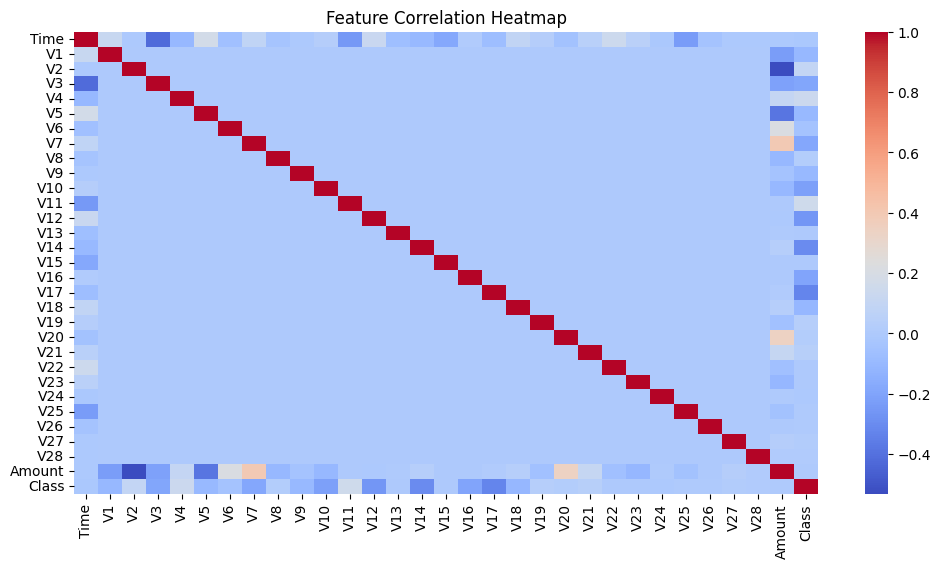

In [54]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Training Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x=y_resampled)
plt.title("Class Distribution: Fraud vs Legitimate Transactions (After SMOTE)")
plt.show()

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()
